Se importan las librerias necesarias

In [8]:
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from matplotlib.pyplot import figure
import re
import pydotplus
import csv
import os
from sklearn.model_selection import train_test_split
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
from os import walk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import preprocessing
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
from utils import preprocesDataFrame
from utils import plotConfusionMatrix
from utils import plotConfusionMatrix_2
from utils import createCSV
from utils import plotFeatureImportance
from utils import createDataFrame
from utils import filterByIP
from utils import plotCorrelation
from utils import dimensionalityReduction
from utils import dimensionalityReduction_2
from bashUtils import createArgusFilesOutput
import constants
import json
import re

Se levanta el archivo Json donde estan las variables

In [2]:
variables=json.load(open(f'variables.json',))
scannerIps = variables["scannerIps"]
targetIps = variables["targetIps"]
trainDataPath = variables["trainingData"]

**Funcion** que categoriza los datos

In [3]:
import re
def categorizeFlows(df):
    es_escaneo = []
    counter = 0
    ipAtacante=r"^192\.168\.1\.177\."
    ipVictima= r"^192\.168\.1\.112\."
    for row in df.itertuples():
        scan = 0
        for i in range (0, len(scannerIps)):
            ##22-24
        #if re.match(ipAtacante,row[22]):
            #if re.match(ipVictima,row[24]):
            if (row[22].find(scannerIps[i])>=0 and row[24].find(targetIps[i])>=0):
            #if (row[22] == '192.168.1.177' and row[24] == '192.168.1.112'):
            #if (row[22].find('192.168.1.177')>=0 and row[24].find('192.168.1.112')>=0):
                print(row[22],row[24])
                scan = 1
                break;
        counter +=  scan
        es_escaneo.append(scan)
    print("data categorization DONE", counter)
    return es_escaneo

CSV >> DF DONE
192.168.1.177 192.168.1.112
192.168.1.177.61561 192.168.1.112.pop3s
192.168.1.177.61563 192.168.1.112.pop3s
192.168.1.177.61561 192.168.1.112.smux
192.168.1.177.61563 192.168.1.112.smux
192.168.1.177.61561 192.168.1.112.mysql
192.168.1.177.61561 192.168.1.112.rtsp
192.168.1.177.61563 192.168.1.112.mysql
192.168.1.177.61563 192.168.1.112.rtsp
192.168.1.177.61561 192.168.1.112.ssh
192.168.1.177.61561 192.168.1.112.submission
192.168.1.177.61563 192.168.1.112.ssh
192.168.1.177.61563 192.168.1.112.submission
192.168.1.177.61561 192.168.1.112.domain
192.168.1.177.61563 192.168.1.112.domain
192.168.1.177.61561 192.168.1.112.epmap
192.168.1.177.61561 192.168.1.112.telnet
192.168.1.177.61563 192.168.1.112.epmap
192.168.1.177.61563 192.168.1.112.telnet
192.168.1.177.61561 192.168.1.112.ftp
192.168.1.177.61561 192.168.1.112.imap2
192.168.1.177.61563 192.168.1.112.imap2
192.168.1.177.61563 192.168.1.112.ftp
192.168.1.177.61561 192.168.1.112.https
192.168.1.177.61561 192.168.1.112.h

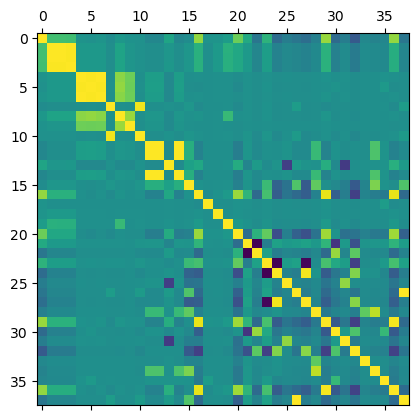

correlation:  tcp_selective_ack_ok tcp_window_scale
correlation:  tcp_timestamp tcp_window_scale
correlation:  tcp_timestamp tcp_selective_ack_ok
correlation:  srcpkts pkts
correlation:  dstpkts pkts
correlation:  dstpkts srcpkts
correlation:  rate srcload
correlation:  runtime mean
correlation:  sum mean
correlation:  sum runtime
correlation:  icmp_info_U icmp_info_-
correlation:  opciones_ip_A opciones_ip_-
correlation:  protocolo_igmp opciones_ip_-
correlation:  protocolo_igmp opciones_ip_A
correlation:  state_RST protocolo_tcp
correlation:  state_URP protocolo_icmp
corralated columns REMOVED
['tcp_maximum_segment_size', 'tcp_window_scale', 'pkts', 'srcload', 'dstload', 'loss', 'mean', 'idle', 'sttl', 'dttl', 'ackdat_time', 'srcwin', 'dstwin', 'es_escaneo', 'icmp_info_-', 'opciones_ip_-', 'protocolo_arp', 'protocolo_icmp', 'protocolo_ipv6-icmp', 'protocolo_tcp', 'protocolo_udp', 'state_CON', 'state_INT', 'state_MRQ', 'state_NRS', 'state_REQ']
26


In [4]:
#una ves ejecutados, se comenta
#createArgusFilesOutput(trainDataPath)
#createCSV(trainDataPath)
####
df=createDataFrame(trainDataPath)

vectorEscaneo = categorizeFlows(df)
#agrego columna es_escaneo
df['es_escaneo'] = vectorEscaneo


df=preprocesDataFrame(df)
df=dimensionalityReduction(df)
df=df.sample(frac=1)


# **Entrenamiento del Modelo**





Varriables de entrenamiento y test

In [6]:
#train_test -> es una funcion q proporciona sklearn
#con test_size se indica que el 20% de los datos
#son para test, mientras que el 80% son para prueba
#print(df)



train, test = train_test_split(df, test_size=0.2)
#print(train.columns)
#Agrego columna
Y_train = train['es_escaneo']
#Elimino columna para q aprenda
X_train = train.drop(columns=[constants.ESCANEO]);



In [7]:
#Lo mismo para variables de test
Y_test = test[constants.ESCANEO]
X_test = test.drop(columns=[constants.ESCANEO]);

**Entrenamiento**

In [9]:
model = RandomForestClassifier(random_state=0, n_estimators=50, oob_score=True)
model = model.fit(X_train,Y_train)

joblib.dump(model, 'rForest.pkl')

['rForest.pkl']

### Grafico del Arbol de Decision

Y column dropped
out of bag score 0.9985443959243085
[DecisionTreeClassifier(max_features='sqrt', random_state=209652396), DecisionTreeClassifier(max_features='sqrt', random_state=398764591), DecisionTreeClassifier(max_features='sqrt', random_state=924231285), DecisionTreeClassifier(max_features='sqrt', random_state=1478610112), DecisionTreeClassifier(max_features='sqrt', random_state=441365315), DecisionTreeClassifier(max_features='sqrt', random_state=1537364731), DecisionTreeClassifier(max_features='sqrt', random_state=192771779), DecisionTreeClassifier(max_features='sqrt', random_state=1491434855), DecisionTreeClassifier(max_features='sqrt', random_state=1819583497), DecisionTreeClassifier(max_features='sqrt', random_state=530702035), DecisionTreeClassifier(max_features='sqrt', random_state=626610453), DecisionTreeClassifier(max_features='sqrt', random_state=1650906866), DecisionTreeClassifier(max_features='sqrt', random_state=1879422756), DecisionTreeClassifier(max_features='sqrt',

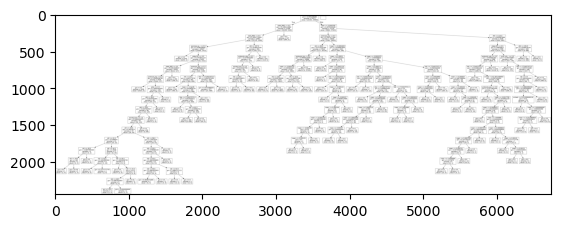

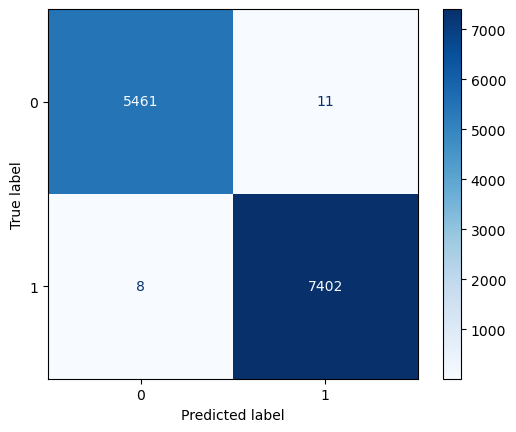

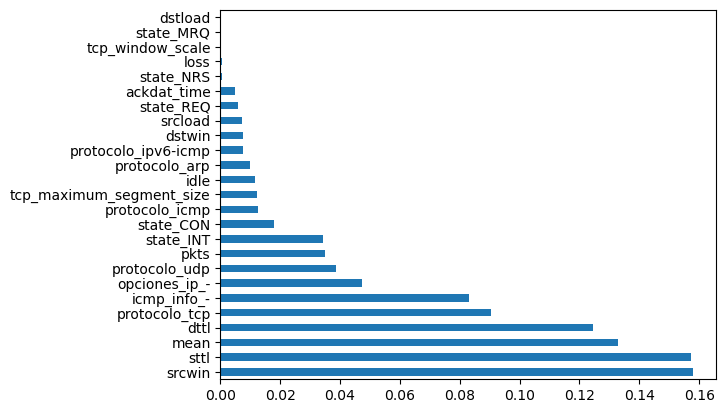

In [10]:
df = df.drop(columns=[constants.ESCANEO]);
print("Y column dropped")
joblib.dump(df.columns.tolist(), 'columns.txt')
print ("out of bag score",model.oob_score_)
print(model.estimators_)
data = tree.export_graphviz(model.estimators_[0], out_file=None, feature_names=df.dtypes.keys(), precision = 10)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

print("now plotting")
img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)


plotConfusionMatrix_2(model, X_test, Y_test)
plotFeatureImportance(model, X_train)
plt.show();

In [11]:
print(df)
#df = df.drop(1)
#df.loc[0,'srcload']=0

       tcp_maximum_segment_size  tcp_window_scale  pkts    srcload  dstload  \
55161                       0.0               0.0   1.0        0.0      0.0   
43653                       0.0               0.0   2.0        0.0      0.0   
49741                       1.0               0.0   2.0        0.0      0.0   
48512                       0.0               0.0   1.0        0.0      0.0   
14231                       0.0               0.0   2.0  8244275.0      0.0   
...                         ...               ...   ...        ...      ...   
25466                       0.0               0.0   1.0        0.0      0.0   
40190                       1.0               0.0   2.0        0.0      0.0   
17030                       0.0               0.0   2.0        0.0      0.0   
25420                       0.0               0.0   1.0        0.0      0.0   
24257                       0.0               0.0   1.0        0.0      0.0   

       loss      mean          idle   sttl   dttl  

In [11]:
#process = createArgusDaemonOutput(demoDirPath)
#for line in io.TextIOWrapper(process.stdout, encoding="utf-8"):
#    print(line)

NameError: name 'createArgusDaemonOutput' is not defined

In [19]:
import datetime as dt                        
import statsmodels.api as sm                 
import seaborn as sns                        
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from matplotlib.pyplot import figure
import re
import pydotplus
import csv
import os
from sklearn.model_selection import train_test_split
from colorama import Fore, Style
from os import walk
from sklearn import tree, preprocessing
import joblib
from utils import *
from bashUtils import *
import constants
import io
import sys
import json
demoDirPath = variables["demoData"];

demoDirPath = variables["demoData"];



def addMissingEncodedColumns(df):
    treeColumns = joblib.load('columns.txt')
    df = df.drop(columns=list(filter(lambda c: not (c in treeColumns), df.columns.tolist())))
    for c in treeColumns:
        if not (c in df):
            df[c] = 0

    df = df[treeColumns]
    return df

process = createArgusDaemonOutput(demoDirPath)
clf = joblib.load('bag.pkl')
print("Real time netflow");
while True:
    header=True
    lines = io.TextIOWrapper(process.stdout, encoding="utf-8")
    #for line in io.TextIOWrapper(process.stdout, encoding="utf-8"):
    next(lines)
    for line in lines:
        if not header:
            df = getFlowDataFrame(line)

            output = '{:^22}'.format(df[constants.FECHA][0]) + '{:^10}'.format(df[constants.PROTO][0]) + '{:^35}'.format(df[constants.SRCADDR][0])+ '{:^35}'.format(df[constants.DSTADDR][0])+ '{:^5}'.format(df[constants.STATE][0])+ '{:^10}'.format(df[constants.SUM][0])+"\n"
            df = preprocesDataFrame(df)

            df = addMissingEncodedColumns(df)
            #print(output)

            if clf.predict(df) == 1:
                #sys.stdout.shell.write(output, "COMMENT")
             print(Fore.RED+output+Style.RESET_ALL)
            else:
                #sys.stdout.shell.write(output, "STRING")
             print(Fore.GREEN+output+Style.RESET_ALL)
             
        else:
            header=False

    if input() == 'STOP':
        process.kill()
        break;

init argus daemon
start netflows capture
Real time netflow
2024-08-20 16:33:28.078210   tcp            192.168.1.177.51367                192.168.1.112.7937          REQ    0.0    

2024-08-20 16:33:28.528604   tcp            192.168.1.177.51369                192.168.1.112.7937          REQ    0.0    

2024-08-20 16:33:28.960600ipv6-icmp           fe80::1.0x0085                     ff02::1.0x0000            NRS  4.223224 

2024-08-20 16:33:28.971038   tcp            192.168.1.177.51367                192.168.1.112.51103         REQ    0.0    

2024-08-20 16:33:29.412520   tcp            192.168.1.177.51369                192.168.1.112.51103         REQ    0.0    

2024-08-20 16:33:29.854162   tcp            192.168.1.177.51367                192.168.1.112.2100          REQ    0.0    

2024-08-20 16:33:30.296382   tcp            192.168.1.177.51369                192.168.1.112.2100          REQ    0.0    

2024-08-20 16:33:30.338624   udp             192.168.1.1.48941                23

KeyboardInterrupt: 

In [ ]:
print(df)